In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_excel('/content/Modelo 2.xlsx')

In [ ]:
df

,Total_Prisões,Praça,Agentes,Delegados,Viaturas
0,17,363,17,6,25
1,30,363,17,6,25
2,24,363,17,6,25
3,36,363,17,6,25
4,19,363,20,7,22
...,...,...,...,...,...
204,20,261,33,7,27
205,24,261,33,7,27
206,17,261,33,7,27
207,12,261,33,7,27


In [ ]:
# Separar as features (X) e o target (y)
X = df.drop('Total_Prisões', axis=1)  # Definindo Total de prisões como coluna alvo
y = df['Total_Prisões']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data, train_targets = X_train, y_train
test_data, test_targets = X_test, y_test

In [ ]:
# Normalizar os dados para facilitar o treinamento da rede
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data)
X_test_scaled = scaler.transform(test_data)

In [ ]:
# Visualizando um head dos dados
X_train_scaled[0]

array([-0.80667632,  0.87131696, -2.0123146 , -0.0886928 ])

In [ ]:
# Definindo a métrica RMSE personalizada
def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)  # Converte y_true para float32
    y_pred = tf.cast(y_pred, tf.float32)  # Converte y_pred para float32
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

In [ ]:
#  Construção do Modelo
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1:])))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=[rmse])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,921 (163.75 KB)

 Trainable params: 41,921 (163.75 KB)

 Non-trainable params: 0 (0.00 B)

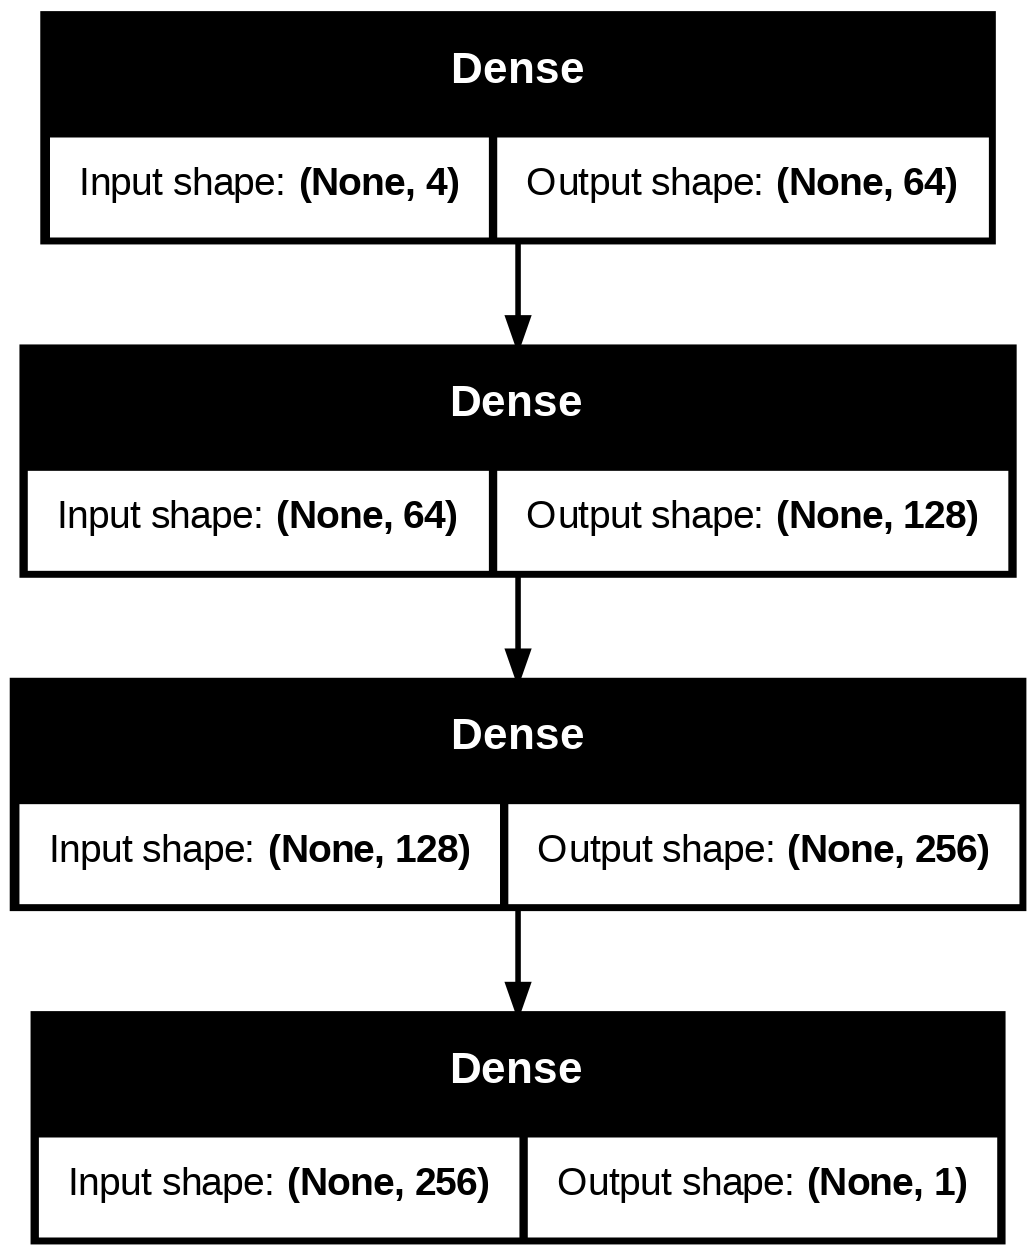

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
#Treinar o modelo
history = model.fit(train_data, train_targets, epochs=150, validation_split=0.2)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 261.9952 - rmse: 15.0670 - val_loss: 214.1851 - val_rmse: 13.6238
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 136.5234 - rmse: 11.1026 - val_loss: 201.2971 - val_rmse: 14.1769
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 131.2276 - rmse: 11.2137 - val_loss: 96.4947 - val_rmse: 8.9941
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.0303 - rmse: 8.6643 - val_loss: 57.2727 - val_rmse: 7.6445
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.7165 - rmse: 7.8922 - val_loss: 25.5368 - val_rmse: 4.7510
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36.4240 - rmse: 6.0186 - val_loss: 25.3883 - val_rmse: 4.7462
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 36.6932 - rmse: 5.8356 - val_loss: 40.8205 - val_rmse: 6.5733
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37.8515 - rmse: 6.1723 - val_loss: 26.0659 - val_rmse: 4.7659
Epoch 9/150
5/5 ━━━━━━━━━━━━━━

In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_rmse = model.evaluate(test_data, test_targets)
print(f"RMSE no teste: {test_rmse:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.9906 - rmse: 5.8450 
RMSE no teste: 6.041


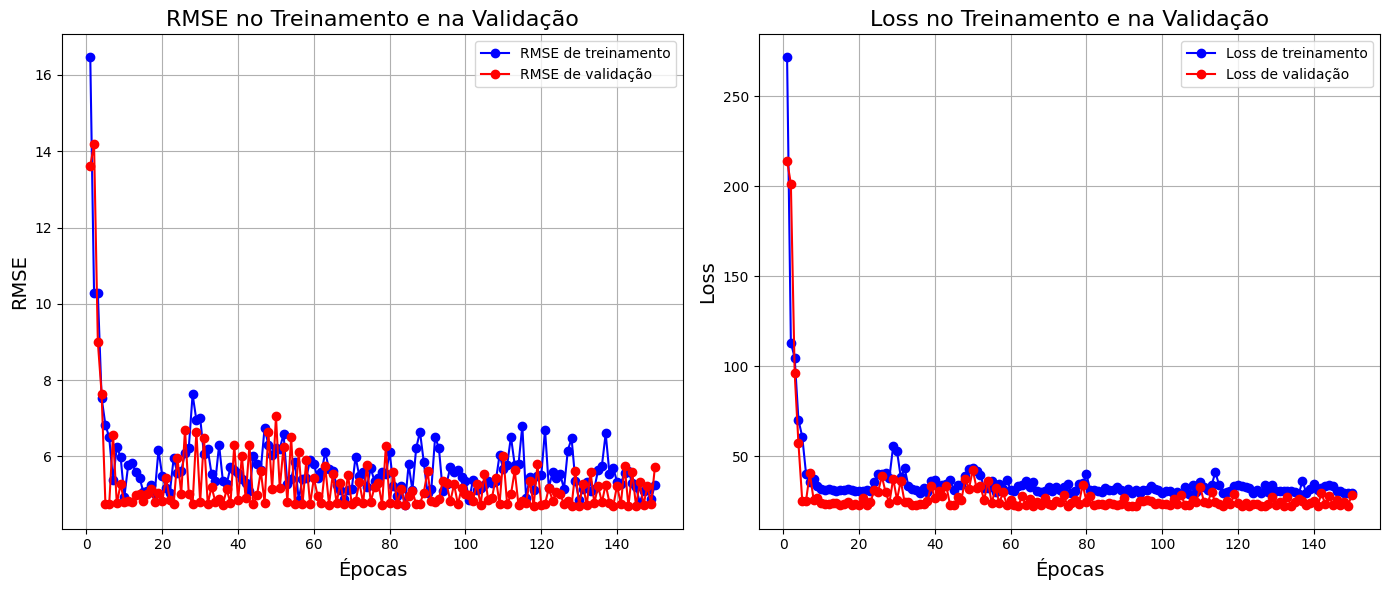

In [ ]:
import matplotlib.pyplot as plt

# Suponha que 'history' é o retorno da função fit() do seu modelo
loss = history.history['loss']
val_loss = history.history['val_loss']
rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(1, len(loss) + 1)

# Plot da RMSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, rmse, 'o-', color='blue', label='RMSE de treinamento')
plt.plot(epochs, val_rmse, 'o-', color='red', label='RMSE de validação')
plt.title('RMSE no Treinamento e na Validação', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.legend()
plt.grid(True)

# Plot da perda
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'o-', color='blue', label='Loss de treinamento')
plt.plot(epochs, val_loss, 'o-', color='red', label='Loss de validação')
plt.title('Loss no Treinamento e na Validação', fontsize=16)
plt.xlabel('Épocas', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Predição e visualização
predictions = model.predict(test_data)

# Colocar valores reais e preditos em um DataFrame
results_df = pd.DataFrame({'Valor Real': test_targets, 'Valor Predito': predictions.flatten()})

# Exibir o DataFrame
print(results_df.head(50))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
     Valor Real  Valor Predito
30           19      20.595213
171          16      16.246281
84           20      20.786007
198          10      15.232769
60           28      19.414829
155          24      16.589527
45           21      20.645691
181          18      15.710673
9            28      19.545898
195          15      15.232769
136          12      16.029121
186          11      15.052039
206          17      14.366640
126          15      17.445642
15           28      21.495720
73           25      19.935226
165          10      15.648004
18           28      23.363556
167          16      15.648004
93           26      17.522045
75           18      19.935226
55           22      19.318581
147          18      16.512890
109          14      18.715832
108          18      18.715832
142          21      15.765577
25           26      26.374310
125          13      17.413668
16           14      21.495720
172          13      16.246281
1